# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

In [66]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

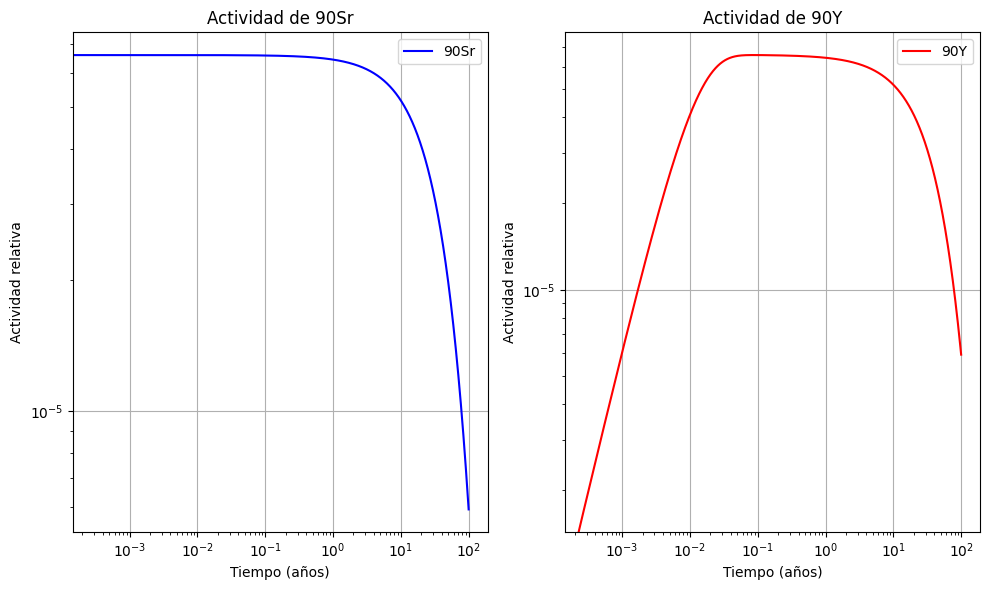

In [67]:
# Constantes físicas
vida_media_Sr = 28.78  # años
vida_media_Y = 2.67     # días

# Convertir vidas medias a constantes de desintegración 
lambda_Sr = np.log(2) / (vida_media_Sr * 365)  # 1/días
lambda_Y = np.log(2) / vida_media_Y            # 1/días

# Condiciones iniciales
N_Sr0 = 1.0  
N_Y0 = 0.0   

# Parámetros de la simulación
t_max = 100 * 365  # 100 años en días
dt = 0.1           # Paso de tiempo en días

# Inicialización
t = np.arange(0, t_max, dt)
N_Sr = np.zeros_like(t)
N_Y = np.zeros_like(t)
N_Sr[0] = N_Sr0
N_Y[0] = N_Y0

# Método de Euler
for i in range(1, len(t)):
    dN_Sr = -lambda_Sr * N_Sr[i-1] * dt
    N_Sr[i] = N_Sr[i-1] + dN_Sr
    
    dN_Y = (lambda_Sr * N_Sr[i-1] - lambda_Y * N_Y[i-1]) * dt
    N_Y[i] = N_Y[i-1] + dN_Y

# Calcular actividades
A_Sr = lambda_Sr * N_Sr
A_Y = lambda_Y * N_Y

# Graficar
plt.figure(figsize=(10, 6))

# Gráfico para 90Sr
plt.subplot(1, 2, 1)
plt.loglog(t/365, A_Sr, 'b', label='90Sr')
plt.xlabel('Tiempo (años)')
plt.ylabel('Actividad relativa')
plt.title('Actividad de 90Sr')
plt.grid()
plt.legend()

# Gráfico para 90Y
plt.subplot(1, 2, 2)
plt.loglog(t/365, A_Y, 'r', label='90Y')
plt.xlabel('Tiempo (años)')
plt.ylabel('Actividad relativa')
plt.title('Actividad de 90Y')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

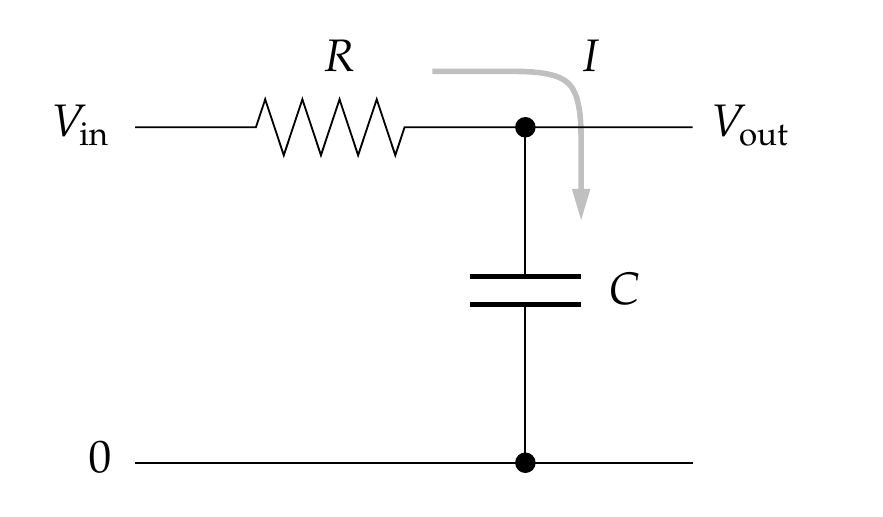

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

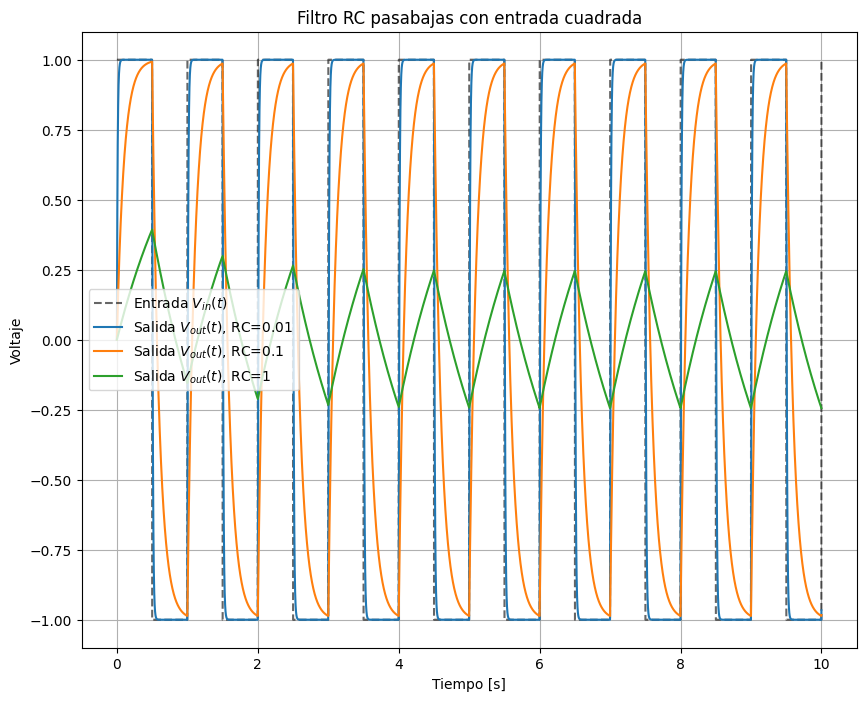

In [68]:
# Definición de la onda cuadrada
def V_in(t):
    return 1 if int(np.floor(2*t)) % 2 == 0 else -1

# Definición de la EDO para V_out
def dVout_dt(Vout, t, RC):
    return (1/RC) * (V_in(t) - Vout)

# Implementación de RK4
def rk4(f, V0, t, RC):
    V = np.zeros(len(t))
    V[0] = V0
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = f(V[i], t[i], RC)
        k2 = f(V[i] + 0.5*h*k1, t[i] + 0.5*h, RC)
        k3 = f(V[i] + 0.5*h*k2, t[i] + 0.5*h, RC)
        k4 = f(V[i] + h*k3, t[i] + h, RC)
        V[i+1] = V[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return V

# Parámetros de simulación
t = np.linspace(0, 10, 10000)  # tiempo
RC_values = [0.01, 0.1, 1]     # diferentes valores de RC

# Graficar resultados
plt.figure(figsize=(10, 8))

# Graficar la señal de entrada
V_in_values = [V_in(tt) for tt in t]
plt.plot(t, V_in_values, 'k--', label="Entrada $V_{in}(t)$", alpha=0.6)

# Resolver y graficar para cada RC
for RC in RC_values:
    Vout = rk4(dVout_dt, V0=0, t=t, RC=RC)
    plt.plot(t, Vout, label=f"Salida $V_{{out}}(t)$, RC={RC}")

plt.title("Filtro RC pasabajas con entrada cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje")
plt.legend()
plt.grid()
plt.show()


# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

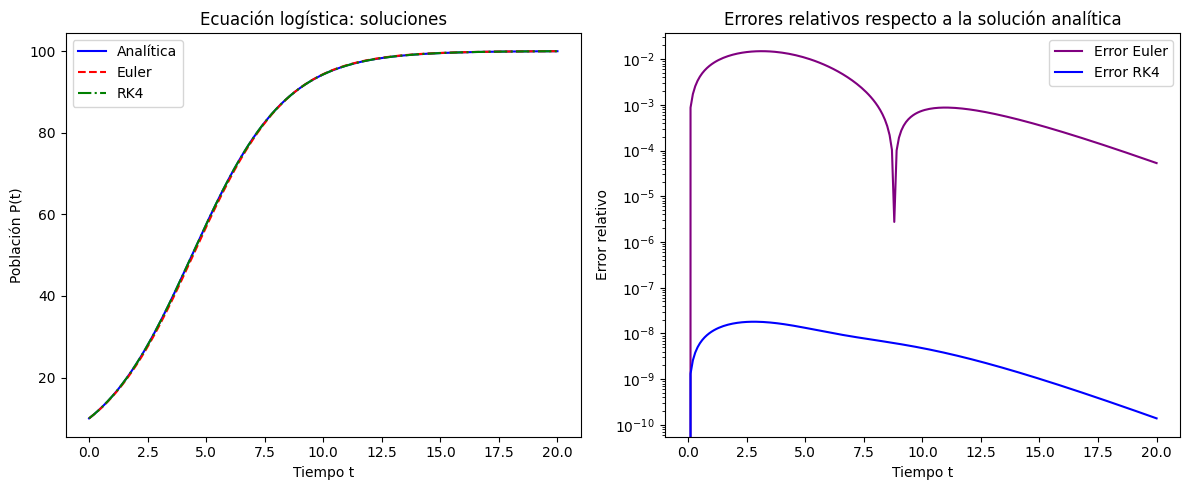

In [69]:
# Parámetros del modelo logístico
r = 0.5    # tasa de crecimiento
K = 100    # capacidad de carga
P0 = 10    # población inicial
t0, tf, h = 0, 20, 0.1
t = np.arange(t0, tf+h, h)

# Ecuación logística
def logistic_eq(P, r, K):
    return r*P*(1 - P/K)

# Solución analítica
def logistic_exact(t, P0, r, K):
    return (K*P0*np.exp(r*t)) / (K + P0*(np.exp(r*t) - 1))

# Método de Euler
def euler(f, P0, t, r, K):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        P[i] = P[i-1] + h*f(P[i-1], r, K)
    return P

# Método RK4
def rk4(f, P0, t, r, K):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        k1 = f(P[i-1], r, K)
        k2 = f(P[i-1] + 0.5*h*k1, r, K)
        k3 = f(P[i-1] + 0.5*h*k2, r, K)
        k4 = f(P[i-1] + h*k3, r, K)
        P[i] = P[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return P

# Resolver con Euler y RK4
P_euler = euler(logistic_eq, P0, t, r, K)
P_rk4   = rk4(logistic_eq, P0, t, r, K)

# Solución analítica evaluada en los mismos tiempos
P_exact = logistic_exact(t, P0, r, K)

# Calcular errores relativos
error_euler = np.abs((P_euler - P_exact) / P_exact)
error_rk4   = np.abs((P_rk4 - P_exact) / P_exact)

# Gráficas
plt.figure(figsize=(12,5))

# Poblaciones
plt.subplot(1,2,1)
plt.plot(t, P_exact, 'b', label='Analítica')
plt.plot(t, P_euler, 'r--', label='Euler')
plt.plot(t, P_rk4, 'g-.', label='RK4')
plt.xlabel('Tiempo t')
plt.ylabel('Población P(t)')
plt.title('Ecuación logística: soluciones')
plt.legend()

# Errores relativos
plt.subplot(1,2,2)
plt.semilogy(t, error_euler, color='purple', label='Error Euler')
plt.semilogy(t, error_rk4, 'b-', label='Error RK4')
plt.xlabel('Tiempo t')
plt.ylabel('Error relativo')
plt.title('Errores relativos respecto a la solución analítica')
plt.legend()

plt.tight_layout()
plt.show()


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=2 \pi \sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

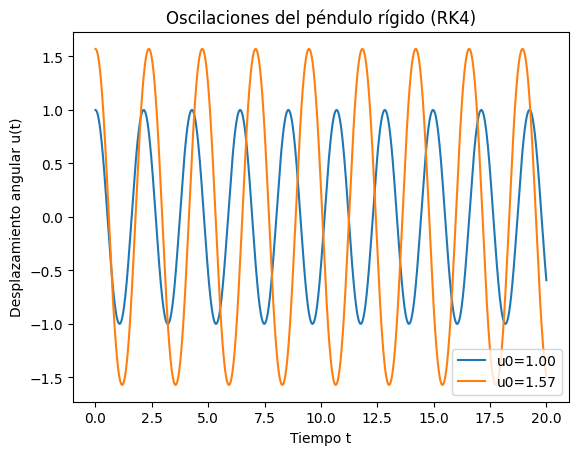

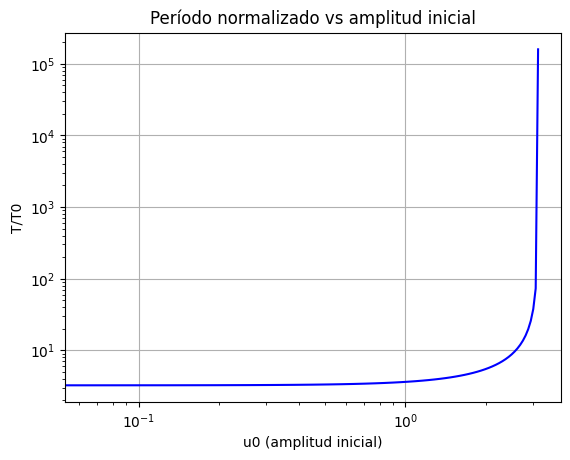

In [70]:
# Parámetros físicos
g = 9.81
l = 1.0

# Ecuación diferencial
def f(t, y):
    u, v = y
    return np.array([v, -(g/l)*np.sin(u)])

# Método RK4
def rk4(f, t, y0, h):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h*k1/2)
        k3 = f(t[i] + h/2, y[i] + h*k2/2)
        k4 = f(t[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

# Integración numérica para K
def K_numeric(alpha, N=10000):
    # evitar incluir z=1 (donde diverge)
    z = np.linspace(0, 1 - 1e-10, N)
    integrand = 1.0 / np.sqrt((1 - z**2) * (1 - alpha*z**2))
    return np.trapz(integrand, z)


# Cálculo del período analítico
def periodo_analitico(u0):
    alpha = np.sin(u0/2)**2
    T0 = 2*np.pi*np.sqrt(l/g)
    return T0 * (2/np.pi) * K_numeric(alpha)

# Condiciones iniciales
h = 0.001
t = np.arange(0, 20, h)

# Casos u0 = 1 y u0 = pi/2
for u0 in [1, np.pi/2]:
    y0 = [u0, 0]   # [u(0), u'(0)]
    sol = rk4(f, t, y0, h)
    
    plt.plot(t, sol[:,0], label=f'u0={u0:.2f}')

plt.xlabel("Tiempo t")
plt.ylabel("Desplazamiento angular u(t)")
plt.title("Oscilaciones del péndulo rígido (RK4)")
plt.legend()
plt.show()

# Comparación T/T0
u0_vals = np.linspace(0, np.pi, 50)
T0 = 2*np.pi*np.sqrt(l/g)
T_vals = [periodo_analitico(u0) for u0 in u0_vals]

plt.loglog(u0_vals, np.array(T_vals)/T0, 'b')
plt.xlabel("u0 (amplitud inicial)")
plt.ylabel("T/T0")
plt.title("Período normalizado vs amplitud inicial")
plt.grid()
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

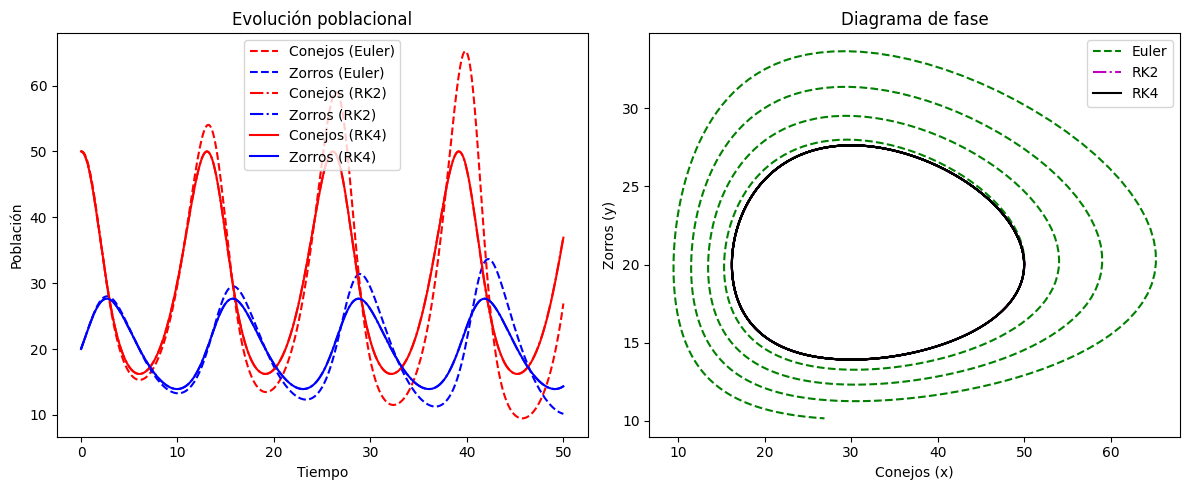

In [71]:
# Parámetros iniciales
alpha, beta, gamma, delta = 0.8, 0.04, 0.3, 0.01
X0 = [50, 20]
t0 = 0 
tf = 50
h = 0.1
params = (alpha, beta, gamma, delta)

# Definición del sistema 
def f(t, X, alpha, beta, gamma, delta):
    x, y = X
    dxdt = alpha*x - beta*x*y
    dydt = -gamma*y + delta*x*y
    return np.array([dxdt, dydt])

# Índice b
# Métodos numéricos
def euler_system(f, t0, tf, h, X0, params):
    n = int((tf - t0)/h) + 1
    t = np.linspace(t0, tf, n)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for i in range(n-1):
        X[i+1] = X[i] + h*f(t[i], X[i], *params)
    return t, X

def rk2_system(f, t0, tf, h, X0, params):
    n = int((tf - t0)/h) + 1
    t = np.linspace(t0, tf, n)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for i in range(n-1):
        k1 = f(t[i], X[i], *params)
        k2 = f(t[i] + h, X[i] + h*k1, *params)
        X[i+1] = X[i] + (h/2)*(k1 + k2)
    return t, X

def rk4_system(f, t0, tf, h, X0, params):
    n = int((tf - t0)/h) + 1
    t = np.linspace(t0, tf, n)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for i in range(n-1):
        k1 = f(t[i], X[i], *params)
        k2 = f(t[i] + h/2, X[i] + h/2*k1, *params)
        k3 = f(t[i] + h/2, X[i] + h/2*k2, *params)
        k4 = f(t[i] + h, X[i] + h*k3, *params)
        X[i+1] = X[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, X

# Método de Euler
t, X_euler = euler_system(f, t0, tf, h, X0, params)
x_euler, y_euler = X_euler[:,0], X_euler[:,1]

# RK23 y RK45
t, X_rk2 = rk2_system(f, t0, tf, h, X0, params)
t, X_rk4 = rk4_system(f, t0, tf, h, X0, params)
x_rk2, y_rk2 = X_rk2[:,0], X_rk2[:,1]
x_rk4, y_rk4 = X_rk4[:,0], X_rk4[:,1]

# Graficar resultados comparativos
plt.figure(figsize=(12,5))

# Poblaciones en el tiempo
plt.subplot(1,2,1)
plt.plot(t, x_euler, 'r--', label="Conejos (Euler)")
plt.plot(t, y_euler, 'b--', label="Zorros (Euler)")
plt.plot(t, x_rk2, 'r-.', label="Conejos (RK2)")
plt.plot(t, y_rk2, 'b-.', label="Zorros (RK2)")
plt.plot(t, x_rk4, 'r', label="Conejos (RK4)")
plt.plot(t, y_rk4, 'b', label="Zorros (RK4)")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.title("Evolución poblacional")

# Diagrama de fase
plt.subplot(1,2,2)
plt.plot(x_euler, y_euler, 'g--', label="Euler")
plt.plot(x_rk2, y_rk2, 'm-.', label="RK2")
plt.plot(x_rk4, y_rk4, 'k', label="RK4")
plt.xlabel("Conejos (x)")
plt.ylabel("Zorros (y)")
plt.legend()
plt.title("Diagrama de fase")

plt.tight_layout()
plt.show()



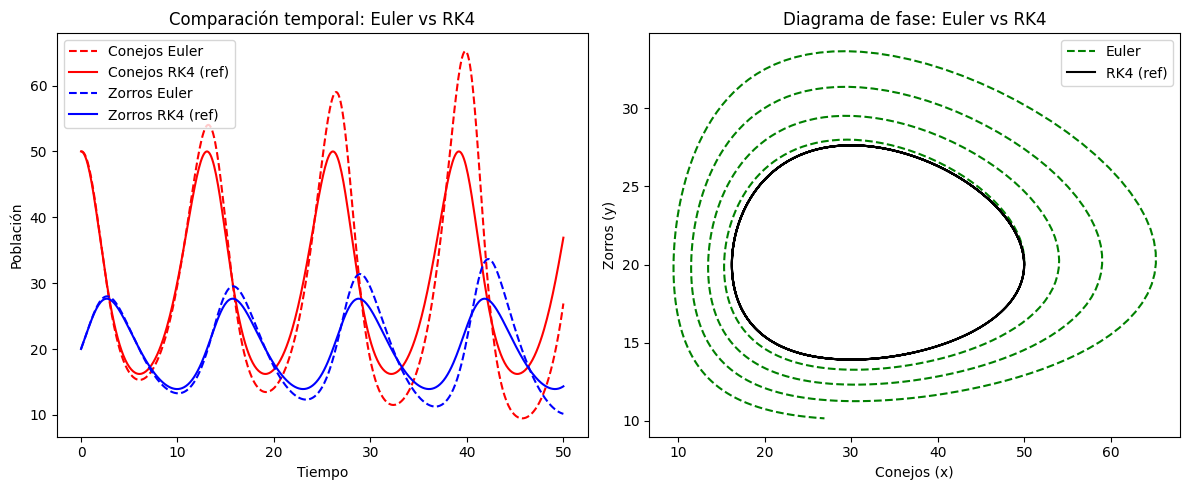

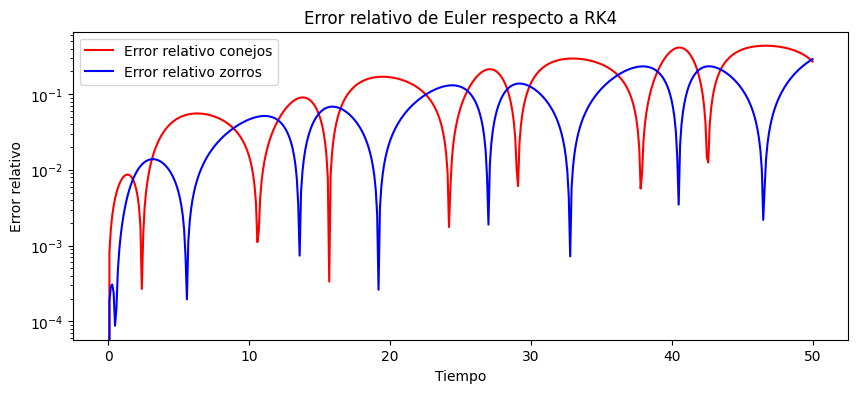

In [72]:
#Índice c
# Comparación Euler vs RK4
error_x = np.abs((x_euler - x_rk4) / x_rk4)
error_y = np.abs((y_euler - y_rk4) / y_rk4)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, x_euler, 'r--', label="Conejos Euler")
plt.plot(t, x_rk4, 'r', label="Conejos RK4 (ref)")
plt.plot(t, y_euler, 'b--', label="Zorros Euler")
plt.plot(t, y_rk4, 'b', label="Zorros RK4 (ref)")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.title("Comparación temporal: Euler vs RK4")

plt.subplot(1,2,2)
plt.plot(x_euler, y_euler, 'g--', label="Euler")
plt.plot(x_rk4, y_rk4, 'k', label="RK4 (ref)")
plt.xlabel("Conejos (x)")
plt.ylabel("Zorros (y)")
plt.title("Diagrama de fase: Euler vs RK4")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t, error_x, 'r', label="Error relativo conejos")
plt.plot(t, error_y, 'b', label="Error relativo zorros")
plt.yscale("log")
plt.xlabel("Tiempo")
plt.ylabel("Error relativo")
plt.title("Error relativo de Euler respecto a RK4")
plt.legend()
plt.show()

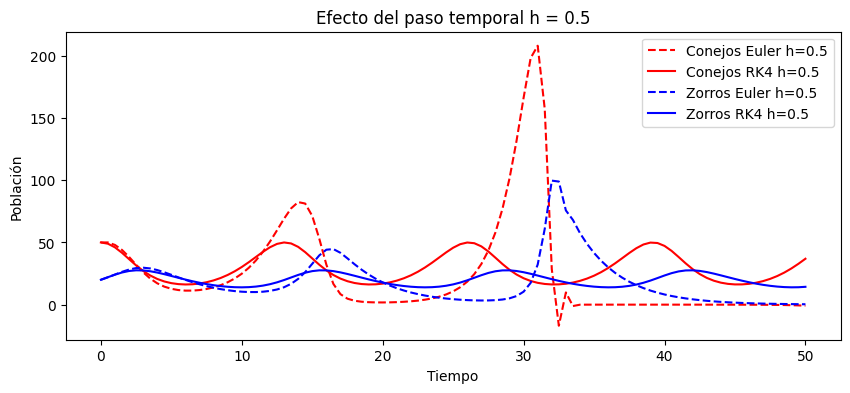

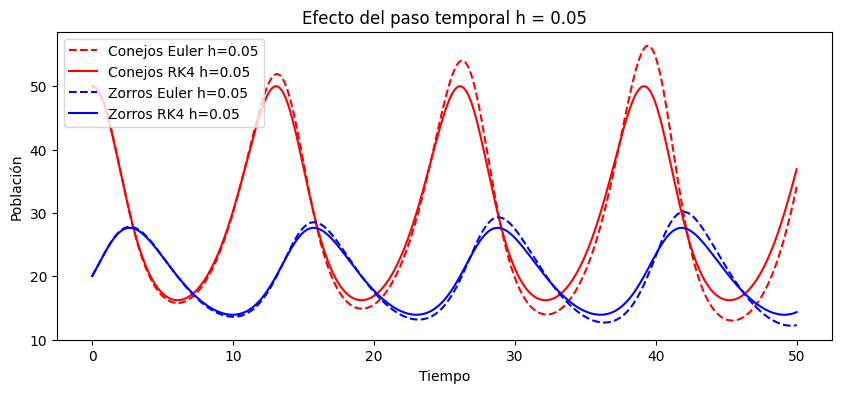

In [73]:
# Índice d
# Estabilidad con h = 0.5 y h = 0.05
for h_test in [0.5, 0.05]:
    t_h, X_euler_h = euler_system(f, t0, tf, h_test, X0, params)
    t_h, X_rk4_h = rk4_system(f, t0, tf, h_test, X0, params)
    plt.figure(figsize=(10,4))
    plt.plot(t_h, X_euler_h[:,0], 'r--', label=f"Conejos Euler h={h_test}")
    plt.plot(t_h, X_rk4_h[:,0], 'r', label=f"Conejos RK4 h={h_test}")
    plt.plot(t_h, X_euler_h[:,1], 'b--', label=f"Zorros Euler h={h_test}")
    plt.plot(t_h, X_rk4_h[:,1], 'b', label=f"Zorros RK4 h={h_test}")
    plt.xlabel("Tiempo"); plt.ylabel("Población"); plt.legend()
    plt.title(f"Efecto del paso temporal h = {h_test}")
    plt.show()

## Análisis:

- Con h = 0.5, el método de Euler se observa inestable, ya que mueestra oscilaciones fuera de lo común, presentando una desalinación respecto al otro método RK4
- Con h = 0.05, el método de Euler mejora notoriamente, presentando mejores oscilaciones, más acordes.
- RK4 se muestra como un método bastante preciso, ya que no presenta mayores cambios respecto a la variación de h.

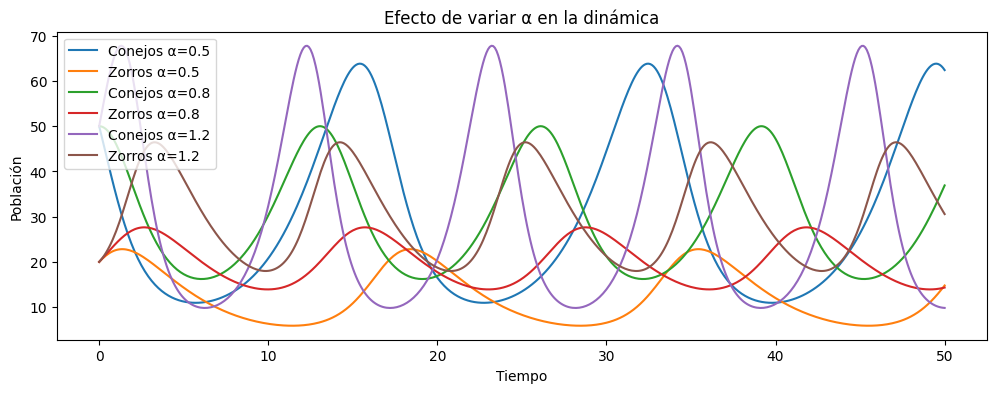

In [74]:
# Índice e
# Variación de parámetros
alpha_values = [0.5, 0.8, 1.2]  # variación de la tasa de crecimiento de conejos

plt.figure(figsize=(12,4))
for a in alpha_values:
    params_var = (a, beta, gamma, delta)
    t_var, X_var = rk4_system(f, t0, tf, h, X0, params_var)
    plt.plot(t_var, X_var[:,0], label=f"Conejos α={a}")
    plt.plot(t_var, X_var[:,1], label=f"Zorros α={a}")

plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Efecto de variar α en la dinámica")
plt.legend()
plt.show()

## Conclusiones variando α:
- α (0.5): los conejos crecen lentamente -> menos alimento -> zorros disminuyen.
- α (0.8): oscilaciones estables alrededor del equilibrio.
- α (1.2): los conejos crecen más rápido -> mayor alimento -> los zorros también aumentan.

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


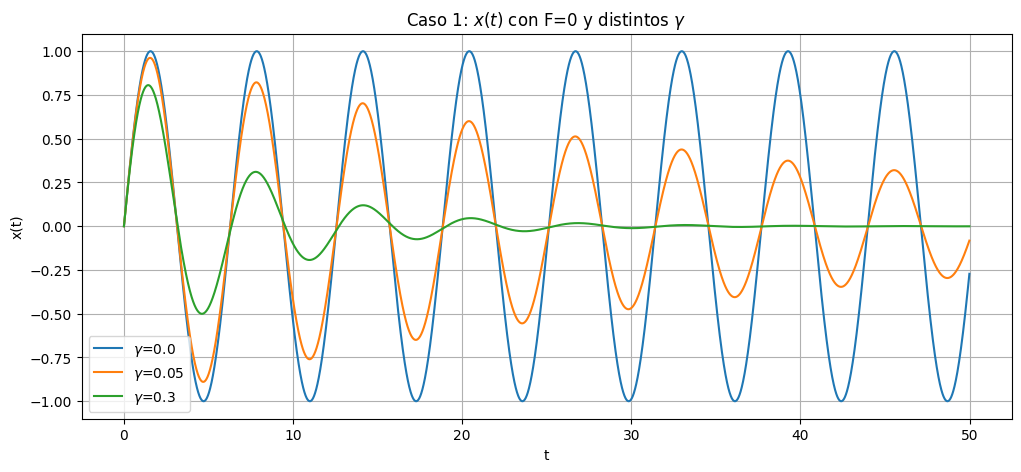

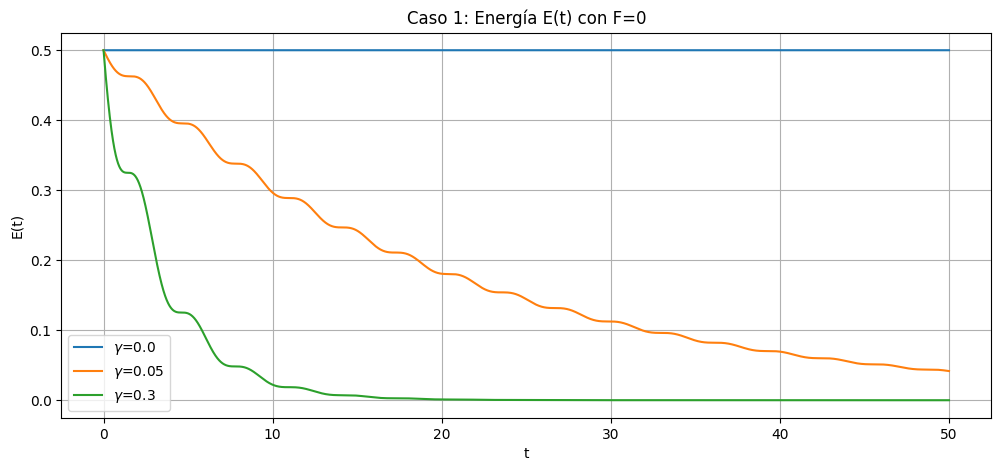

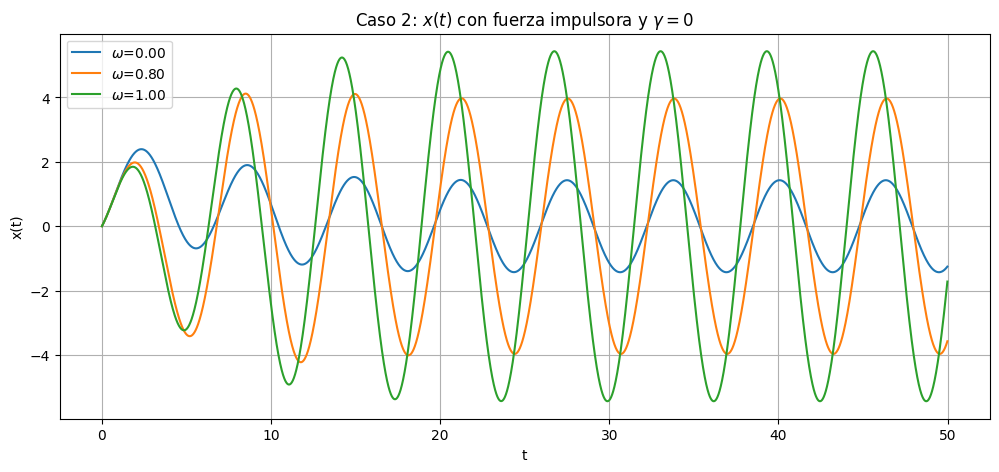

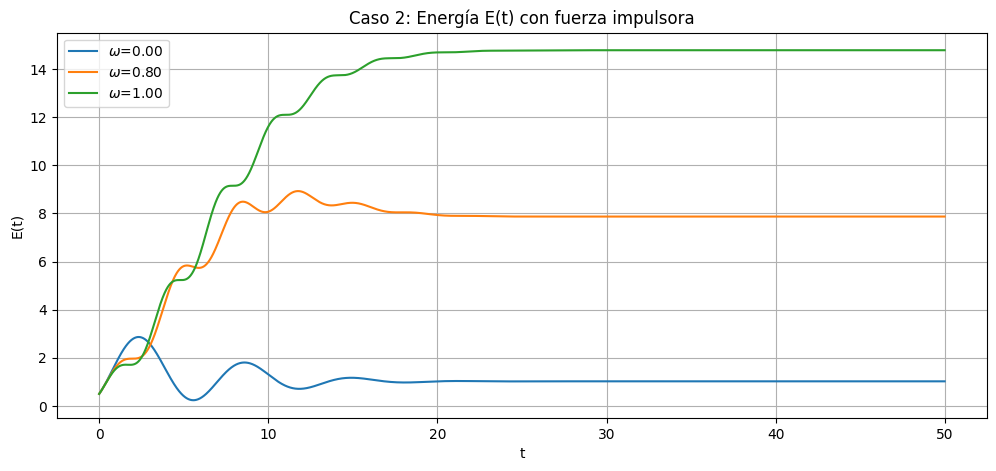

In [75]:
# Parámetros físicos
m = 1.0      # masa
k = 1.0      # constante elástica
omega0 = np.sqrt(k/m)  # frecuencia natural

# Condiciones iniciales
x0 = 0.0
v0 = 1.0

# Tiempo de simulación
t_max = 50
h = 0.01
t = np.arange(0, t_max, h)

# Definición del integrador RK4 para el sistema
def rk4(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + dt*k1/2, t[i-1] + dt/2)
        k3 = f(y[i-1] + dt*k2/2, t[i-1] + dt/2)
        k4 = f(y[i-1] + dt*k3, t[i-1] + dt)
        y[i] = y[i-1] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return y

# Energía total
def energia(x, v):
    return 0.5*m*v**2 + 0.5*k*x**2

# Caso 1: F = 0, distintos gammas
gammas = [0.0, 0.05, 0.3]

plt.figure(figsize=(12,5))

for gamma in gammas:
    # Sistema con F=0
    def f(y, t):
        x, v = y
        dxdt = v
        dvdt = (0/m) - gamma*v - omega0**2 * x
        return np.array([dxdt, dvdt])
    
    sol = rk4(f, [x0, v0], t)
    x, v = sol[:,0], sol[:,1]
    
    plt.plot(t, x, label=f"$\gamma$={gamma}")
    
plt.title("Caso 1: $x(t)$ con F=0 y distintos $\gamma$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

# Energía
plt.figure(figsize=(12,5))
for gamma in gammas:
    def f(y, t):
        x, v = y
        dxdt = v
        dvdt = (0/m) - gamma*v - omega0**2 * x
        return np.array([dxdt, dvdt])
    
    sol = rk4(f, [x0, v0], t)
    x, v = sol[:,0], sol[:,1]
    E = energia(x,v)
    plt.plot(t, E, label=f"$\gamma$={gamma}")
    
plt.title("Caso 1: Energía E(t) con F=0")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.legend()
plt.grid()
plt.show()

# Caso 2: gamma=0, F = F0*cos(omega*t)*exp(-t^2/T^2)
F0 = 1.0
T = 10.0
omegas = [0.0, 0.8*omega0, omega0]

plt.figure(figsize=(12,5))

for omega in omegas:
    def f(y, t):
        x, v = y
        dxdt = v
        F = F0*np.cos(omega*t)*np.exp(-t**2/T**2)
        dvdt = (F/m) - 0*v - omega0**2 * x
        return np.array([dxdt, dvdt])
    
    sol = rk4(f, [x0, v0], t)
    x, v = sol[:,0], sol[:,1]
    plt.plot(t, x, label=f"$\omega$={omega:.2f}")
    
plt.title("Caso 2: $x(t)$ con fuerza impulsora y $\gamma=0$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

# Energía
plt.figure(figsize=(12,5))
for omega in omegas:
    def f(y, t):
        x, v = y
        dxdt = v
        F = F0*np.cos(omega*t)*np.exp(-t**2/T**2)
        dvdt = (F/m) - 0*v - omega0**2 * x
        return np.array([dxdt, dvdt])
    
    sol = rk4(f, [x0, v0], t)
    x, v = sol[:,0], sol[:,1]
    E = energia(x,v)
    plt.plot(t, E, label=f"$\omega$={omega:.2f}")
    
plt.title("Caso 2: Energía E(t) con fuerza impulsora")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.legend()
plt.grid()
plt.show()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa. 

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh** 
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

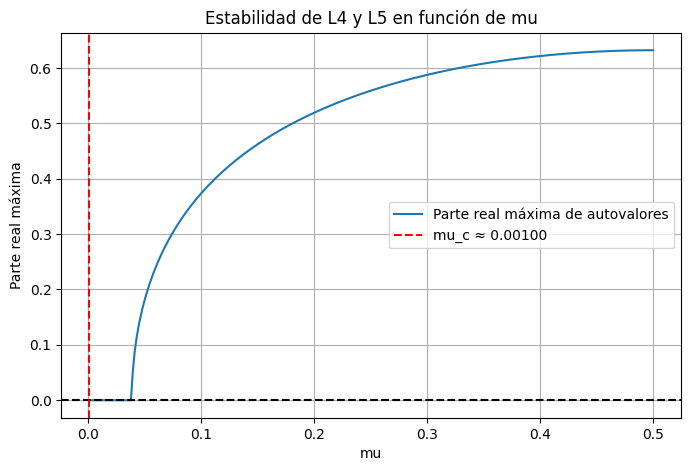


CONCLUSIÓN:
El valor crítico de mu ≈ 0.001000
Para μ < μ_c: L₄ y L₅ son estables
Para μ > μ_c: L₄ y L₅ son inestables

ANÁLISIS PARA SISTEMA SOL-TIERRA Y SOL-JÚPITER
--------------------------------------------------
μ para Sistema Sol-Tierra: 3.002505e-06
μ para Sistema Sol-Júpiter: 9.533386e-04

Sistema: Sol-Tierra
μ = 3.002505e-06
Parte real máxima de valores propios: 6.383782e-16
ESTABILIDAD: ESTABLE (oscilatorio)
Valores propios:
  λ1 = 6.383782e-16 + 9.999899e-01i
  λ2 = 6.383782e-16 + -9.999899e-01i
  λ3 = -3.432162e-16 + 4.501917e-03i
  λ4 = -3.432162e-16 + -4.501917e-03i

Sistema: Sol-Júpiter
μ = 9.533386e-04
Parte real máxima de valores propios: 2.665918e-16
ESTABILIDAD: ESTABLE (oscilatorio)
Valores propios:
  λ1 = -2.220446e-16 + 9.967594e-01i
  λ2 = -2.220446e-16 + -9.967594e-01i
  λ3 = 2.665918e-16 + 8.044111e-02i
  λ4 = 2.665918e-16 + -8.044111e-02i


In [76]:
# Funciones para el problema
def Uxx(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return 1 - (1 - mu)/r1**3 * (1 - 3*(x+mu)**2/r1**2) - mu/r2**3 * (1 - 3*(x-1+mu)**2/r2**2)

def Uyy(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return 1 - (1 - mu)/r1**3 * (1 - 3*y**2/r1**2) - mu/r2**3 * (1 - 3*y**2/r2**2)

def Uxy(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return 3*(1 - mu)*(x+mu)*y/r1**5 + 3*mu*(x-1+mu)*y/r2**5

# Construcción de la matriz A en L4
def matriz_A(mu, omega=1):
    xL4 = 0.5 - mu
    yL4 = np.sqrt(3)/2
    
    a = Uxx(xL4, yL4, mu)
    b = Uxy(xL4, yL4, mu)
    c = b
    d = Uyy(xL4, yL4, mu)
    
    A = np.array([[0, 1, 0, 0],
                  [a, 0, b, 2*omega],
                  [0, 0, 0, 1],
                  [c, -2*omega, d, 0]])
    return A

# Cálculo de valores propios
mus = np.linspace(0.001, 0.5, 300)
max_real = []

for mu in mus:
    A = matriz_A(mu)
    eigs = np.linalg.eigvals(A)
    max_real.append(np.max(np.real(eigs)))

# Encontrar el mu crítico donde cambia el signo
critico_idx = np.where(np.sign(max_real[:-1]) != np.sign(max_real[1:]))[0][0]
mu_c = mus[critico_idx]

# Graficar resultados
plt.figure(figsize=(8,5))
plt.plot(mus, max_real, label="Parte real máxima de autovalores")
plt.axhline(0, color='k', linestyle='--')
plt.axvline(mu_c, color='r', linestyle='--', label=f"mu_c ≈ {mu_c:.5f}")
plt.title("Estabilidad de L4 y L5 en función de mu")
plt.xlabel("mu")
plt.ylabel("Parte real máxima")
plt.legend()
plt.grid()
plt.show()

print(f"\nCONCLUSIÓN:")
print(f"El valor crítico de mu ≈ {mu_c:.6f}")
print(f"Para μ < μ_c: L₄ y L₅ son estables")
print(f"Para μ > μ_c: L₄ y L₅ son inestables")


# Análisis para sistema Sol-Tierra y Sol-Júpiter
print("\nANÁLISIS PARA SISTEMA SOL-TIERRA Y SOL-JÚPITER")
print("--------------------------------------------------")

# Masas en kg (valores aproximados)
masa_sol = 1.989e30  # kg
masa_tierra = 5.972e24  # kg
masa_jupiter = 1.898e27  # kg

# Cálculo de mu para diferentes sistemas
def calcular_mu(m1, m2):
    return m2 / (m1 + m2)

mu_sol_tierra = calcular_mu(masa_sol, masa_tierra)
mu_sol_jupiter = calcular_mu(masa_sol, masa_jupiter)

print(f"μ para Sistema Sol-Tierra: {mu_sol_tierra:.6e}")
print(f"μ para Sistema Sol-Júpiter: {mu_sol_jupiter:.6e}")

# Análisis de estabilidad para cada sistema
def analizar_estabilidad_sistema(nombre_sistema, mu):
    A = matriz_A(mu)
    eigs = np.linalg.eigvals(A)
    max_real = np.max(np.real(eigs))
    
    print(f"\nSistema: {nombre_sistema}")
    print(f"μ = {mu:.6e}")
    print(f"Parte real máxima de valores propios: {max_real:.6e}")
    
    if max_real > 1e-10:
        print("ESTABILIDAD: INESTABLE")
    elif np.all(np.abs(np.real(eigs)) < 1e-10):
        print("ESTABILIDAD: ESTABLE (oscilatorio)")
    else:
        print("ESTABILIDAD: CASO LÍMITE")
    
    # Mostrar valores propios detallados
    print("Valores propios:")
    for i, ev in enumerate(eigs):
        print(f"  λ{i+1} = {ev.real:.6e} + {ev.imag:.6e}i")
          
    return eigs

# Analizar ambos sistemas
eigs_sol_tierra = analizar_estabilidad_sistema("Sol-Tierra", mu_sol_tierra)
eigs_sol_jupiter = analizar_estabilidad_sistema("Sol-Júpiter", mu_sol_jupiter)



# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


Autovalores del sistema: [0.+38.89087297j 0.-38.89087297j]


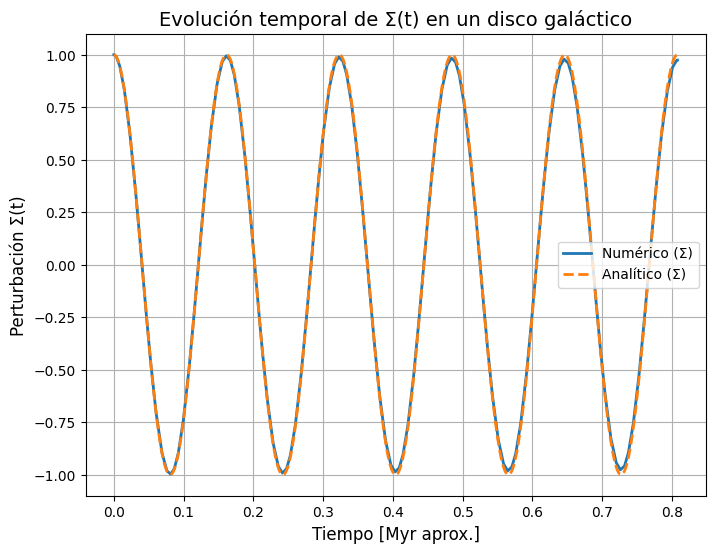

In [77]:
# Parámetros
V0 = 220.0  # km/s
r = 8.0     # kpc
Omega = V0 / r              # frecuencia angular
kappa = np.sqrt(2) * Omega  # frecuencia de epicíclo

# Condiciones iniciales
Sigma0 = 1.0     # perturbación inicial en densidad
dSigma0 = 0.0    # derivada inicial

# Tiempo de integración
t_max = 2 * np.pi / kappa * 5  # 5 periodos de oscilación
t_eval = np.linspace(0, t_max, 500)

# Definimos el sistema de EDOs
def jeans_eq(t, y):
    Sigma, dSigma = y
    d2Sigma = -kappa**2 * Sigma
    return [dSigma, d2Sigma]

# Resolver numéricamente
sol = solve_ivp(jeans_eq, [0, t_max], [Sigma0, dSigma0], method='RK23')

# Solución analítica
Sigma_analitica = Sigma0 * np.cos(kappa * t_eval) + (dSigma0/kappa) * np.sin(kappa * t_eval)

# Mtriz del sistema
A = np.array([[0, 1],
              [-kappa**2, 0]])

# Autovalores del sistema
eigvals, eigvecs = np.linalg.eig(A)

print("Autovalores del sistema:", eigvals)

# Graficar
plt.figure(figsize=(8,6))
plt.plot(sol.t, sol.y[0], label="Numérico (Σ)", lw=2)
plt.plot(t_eval, Sigma_analitica, '--', label="Analítico (Σ)", lw=2)
plt.xlabel("Tiempo [Myr aprox.]", fontsize=12)
plt.ylabel("Perturbación Σ(t)", fontsize=12)
plt.title("Evolución temporal de Σ(t) en un disco galáctico", fontsize=14)
plt.legend()
plt.grid()
plt.show()

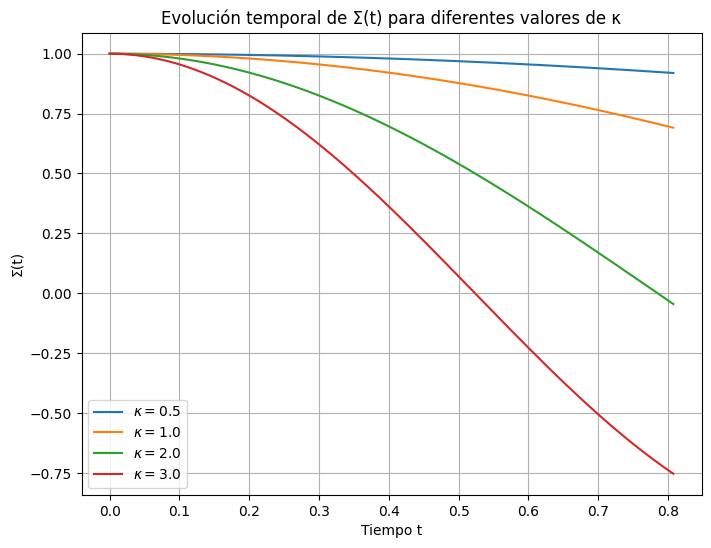

In [80]:
# Análisis de estabilidad al variar κ
kappa_values = [0.5, 1.0, 2.0, 3.0]  # diferentes valores de kappa
plt.figure(figsize=(8,6))

for kappa_test in kappa_values:
    # Definir EDO con este valor de κ
    def jeans_eq_param(t, y, kappa_val):
        Sigma, dSigma = y
        d2Sigma = -kappa_val**2 * Sigma
        return [dSigma, d2Sigma]
    
    # Resolver sistema con este κ
    sol_test = solve_ivp(jeans_eq_param, [0, 50], [Sigma0, dSigma0],
                         args=(kappa_test,), t_eval=t_eval)
    
    # Graficar evolución de Σ(t)
    plt.plot(sol_test.t, sol_test.y[0], label=f"$\kappa={kappa_test}$")

plt.xlabel("Tiempo t")
plt.ylabel("Σ(t)")
plt.title("Evolución temporal de Σ(t) para diferentes valores de κ")
plt.legend()
plt.grid()
plt.show()

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

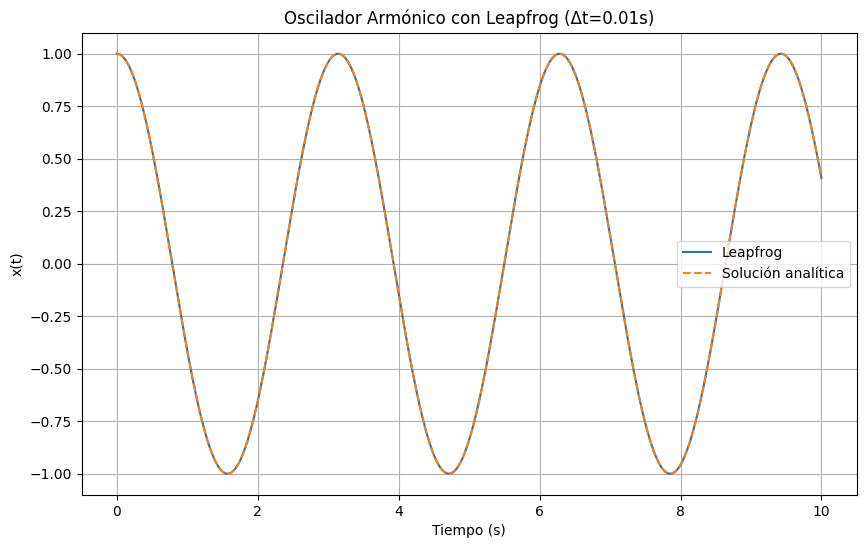

In [79]:
# Parámetros
omega = 2.0          # rad/s
dt = 0.01            # paso de tiempo
t_max = 10.0
N = int(t_max/dt)    # número de pasos

# Inicialización
t = np.linspace(0, t_max, N+1)
x = np.zeros(N+1)
v = np.zeros(N+1)

# Condiciones iniciales
x[0] = 1.0
v[0] = 0.0

# Paso inicial para v en t = dt/2
v_half = v[0] + 0.5 * (-omega**2 * x[0]) * dt

# Algoritmo Leapfrog
for n in range(N):
    # Actualizar posición
    x[n+1] = x[n] + v_half * dt
    
    # Actualizar velocidad medio paso adelante
    v_half = v_half + (-omega**2 * x[n+1]) * dt
    
    # Guardar velocidad en paso entero (opcional, para comparación)
    v[n+1] = v_half + 0.5 * (-omega**2 * x[n+1]) * dt

# Solución analítica para comparar
x_analitica = np.cos(omega * t)

# Graficar
plt.figure(figsize=(10,6))
plt.plot(t, x, label="Leapfrog")
plt.plot(t, x_analitica, '--', label="Solución analítica")
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.title("Oscilador Armónico con Leapfrog (Δt=0.01s)")
plt.legend()
plt.grid()
plt.show()
